<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/pruebaSimulacionSimpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt

Cajeros automaticos
El cliente AUTO-1 llega a las 0
El cliente AUTO-2 llega a las 0
El cliente AUTO-3 llega a las 0
El cliente AUTO-4 llega a las 0
El cliente AUTO-5 llega a las 0
El caril entra en uso por el auto AUTO-1 a las 0
El auto AUTO-1 entra a estacionarse a las 0
El caril entra en uso por el auto AUTO-2 a las 0
El auto AUTO-2 entra a estacionarse a las 0
El caril entra en uso por el auto AUTO-3 a las 0
El auto AUTO-3 entra a estacionarse a las 0
El cliente AUTO-6 llega a las 3
El auto AUTO-3 termina de a estacionarse a las 3
El  auto AUTO-3 entra a sacar su turno a las 3
El auto AUTO-1 termina de a estacionarse a las 4
El  auto AUTO-1 entra a sacar su turno a las 4
El auto AUTO-2 termina de a estacionarse a las 4
El  auto AUTO-2 entra a sacar su turno a las 4
El  auto AUTO-3 termina de a sacar su turno a las 4
El  auto AUTO-3 entra a pagar matricula 4
El  auto AUTO-1 termina de a sacar su turno a las 5
El  auto AUTO-1 entra a pagar matricula 5
El  auto AUTO-2 termina de a saca

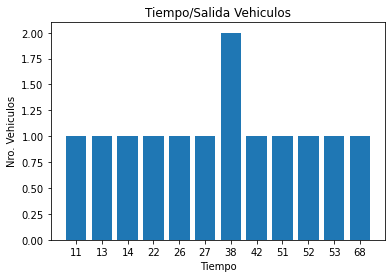

In [67]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
MAX_CLIENTES = 10
NUM_CAJEROS = 3
NUM_CARRILES =3
RANGO_llegada = 3
#Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan la matricula (5 - 10 minutos).
tiempo={}
TIEMPO_SIMULACION=21
# Creamos una clase que permita modelar mi escenario
class CARRIL_ASIGNADO(object):
  def __init__(self, environment, num_carriles):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los cajeros
    self.carril = simpy.Resource(environment, num_carriles)
  #  while cont ==0:
   #   print(f'El auto {cliente} entra a revision a las {env.now}')
    #  yield self.env.timeout(random.normalvariate(20, 10))
     # print(f'El auto {cliente} sale de revision  a las {env.now}')
     # yield self.env.timeout(random.randint(1,3))
     # print(f'El auto {cliente} ya tiene su sello  a las {env.now}')
     # yield self.env.timeout(random.randint(5,10))
     # print(f'El auto {cliente} sale y finaliza  su proceso  a las {env.now}')
     

  def usar_carril(self, cliente):
    print(f'El caril entra en uso por el auto {cliente} a las {env.now}')
    print(f'El auto {cliente} entra a estacionarse a las {env.now}')
    yield self.env.timeout(random.randint(3,5))
    print(f'El auto {cliente} termina de a estacionarse a las {env.now}')
    print(f'El  auto {cliente} entra a sacar su turno a las {env.now}')
    yield self.env.timeout(random.randint(1,3))
    print(f'El  auto {cliente} termina de a sacar su turno a las {env.now}')
    print(f'El  auto {cliente} entra a pagar matricula {env.now}')
    yield self.env.timeout(random.randint(5,10))
    print(f'El  auto {cliente} termina de pagar la matricula {env.now}')

   


def recurso_usuario(env, recurso, nombre):
  print('Intento solicitar recurso')
  cont=0
  with recurso.request() as peticion: # Genero un evento de requerimiento
    yield peticion # Obtengo el recurso
    print ("--------------revision-----------")
    print(f'El auto {nombre} entra a revision a las {env.now}')
    yield env.timeout(random.normalvariate(20, 10))
    print(f'El auto {nombre} proceso de revision  a las {env.now}')
    yield env.timeout(random.randint(1,3))
    print(f'El auto {nombre} ya tiene su sello  a las {env.now}')
    yield env.timeout(random.randint(5,10))
    print(f'El auto {nombre} sale y finaliza  su proceso  a las {env.now}')
    print(f' EL AUTO {nombre} termina de usar recurso en el tiempo {env.now}')
    print (f'EL AUTO {nombre} termina su revision y libera el recurso')
    recurso.release(peticion) #Libero el recurso despues de su uso.
# Obtiene las caracteristicas del recurso






# Generamos el proceso de cola
def llegada_cliente(env, nombre, carrilAsignado):
  print(f'El cliente {nombre} llega a las {env.now}')
  # Especificamos que vamos a usar un recurso (Resource) que representa
  with carrilAsignado.carril.request() as carril:
    # Ocupamos la maquina de lavado
    yield carril
    yield env.process(carrilAsignado.usar_carril(nombre))
    res = simpy.Resource(env, capacity=1)
    #usuario = env.process(recurso_usuario(env, res)) #
    
    proceso = env.process(recurso_usuario(env, res, nombre)) # Dos invocaciones del uso del recurso

    k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
  if k in tiempo:
      tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
  else:
      tiempo[k]=1 # Por defecto empezamos con el primer vehiculo




def ejecutar_simulacion(env, num_carriles):
  carrilAsignado=CARRIL_ASIGNADO(env, num_carriles)
  # Creamos 5 llegadas de clientes iniciales
  for i in range(5):
    env.process(llegada_cliente(env, 'AUTO-%d'%(i+1),carrilAsignado))
    
  # Ejecutamos la simulacion
  while True:
    # Generamos un procesos de llegada uniforme
   
    yield env.timeout(3)
    i+=1
    # Atiendo a los clientes
    env.process(llegada_cliente(env,'AUTO-%d'%(i+1),carrilAsignado))

     # Terminamos despues de 1000 clientes
    if i == 12:
      break
print('Cajeros automaticos')
# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_CARRILES))

# Ejecutamos el proceso
env.run()

# Ejecutamos el proceso durante el tiempo de simulacion


print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()